In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import scipy.io as io
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

In [2]:
#Set up parameters for the figures..
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (12, 1),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'axes.labelweight': 'bold',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

pylab.rcParams.update(params)
pylab.rcParams["font.family"] = "serif"
pylab.rcParams["font.weight"] = "bold"

In [3]:
#Load the validation parameters this can be obtained by running classify_validationmeasure_dataset_1.m..
mat_train = io.loadmat('/work/imagingQ/SpatialAttention_Drowsiness/Jagannathan_Neuroimage2018/'
                       'Scripts/validation/internal_train_64.mat')
mat_test = io.loadmat('/work/imagingQ/SpatialAttention_Drowsiness/Jagannathan_Neuroimage2018/'
                       'Scripts/validation/internal_test_64.mat')

train_sens_alert = mat_train['sensitivity_alert']
train_spec_alert = mat_train['specificity_alert']
train_f1_alert = mat_train['f1_score_alert']

train_sens_alert = train_sens_alert/100
train_spec_alert = train_spec_alert/100


train_sens_alert64 =[]
train_spec_alert64 =[]
train_f1_alert64 =[]
for numdps in range(0, 5):
    train_sens_alert64.append(float(train_sens_alert[0,numdps]))
    train_spec_alert64.append(float(train_spec_alert[0,numdps]))
    train_f1_alert64.append(float(train_f1_alert[0,numdps]))
    
    
train_sens_ripples = mat_train['sensitivity_ripples']
train_spec_ripples = mat_train['specificity_ripples']
train_f1_ripples = mat_train['f1_score_ripples']

train_sens_ripples = train_sens_ripples/100
train_spec_ripples = train_spec_ripples/100


train_sens_ripples64 =[]
train_spec_ripples64 =[]
train_f1_ripples64 =[]
for numdps in range(0, 5):
    train_sens_ripples64.append(float(train_sens_ripples[0,numdps]))
    train_spec_ripples64.append(float(train_spec_ripples[0,numdps]))
    train_f1_ripples64.append(float(train_f1_ripples[0,numdps]))
    
train_sens_grapho = mat_train['sensitivity_grapho']
train_spec_grapho = mat_train['specificity_grapho']
train_f1_grapho = mat_train['f1_score_grapho']

train_sens_grapho = train_sens_grapho/100
train_spec_grapho = train_spec_grapho/100


train_sens_grapho64 =[]
train_spec_grapho64 =[]
train_f1_grapho64 =[]
for numdps in range(0, 5):
    train_sens_grapho64.append(float(train_sens_grapho[0,numdps]))
    train_spec_grapho64.append(float(train_spec_grapho[0,numdps]))
    train_f1_grapho64.append(float(train_f1_grapho[0,numdps]))
    
test_sens_alert = mat_test['sensitivity_alert']
test_spec_alert = mat_test['specificity_alert']
test_f1_alert = mat_test['f1_score_alert']

test_sens_alert = test_sens_alert/100
test_spec_alert = test_spec_alert/100


test_sens_alert64 =[]
test_spec_alert64 =[]
test_f1_alert64 =[]
for numdps in range(0, 5):
    test_sens_alert64.append(float(test_sens_alert[0,numdps]))
    test_spec_alert64.append(float(test_spec_alert[0,numdps]))
    test_f1_alert64.append(float(test_f1_alert[0,numdps]))
    
    
test_sens_ripples = mat_test['sensitivity_ripples']
test_spec_ripples = mat_test['specificity_ripples']
test_f1_ripples = mat_test['f1_score_ripples']

test_sens_ripples = test_sens_ripples/100
test_spec_ripples = test_spec_ripples/100


test_sens_ripples64 =[]
test_spec_ripples64 =[]
test_f1_ripples64 =[]
for numdps in range(0, 5):
    test_sens_ripples64.append(float(test_sens_ripples[0,numdps]))
    test_spec_ripples64.append(float(test_spec_ripples[0,numdps]))
    test_f1_ripples64.append(float(test_f1_ripples[0,numdps]))
    
test_sens_grapho = mat_test['sensitivity_grapho']
test_spec_grapho = mat_test['specificity_grapho']
test_f1_grapho = mat_test['f1_score_grapho']

test_sens_grapho = test_sens_grapho/100
test_spec_grapho = test_spec_grapho/100


test_sens_grapho64 =[]
test_spec_grapho64 =[]
test_f1_grapho64 =[]
for numdps in range(0, 5):
    test_sens_grapho64.append(float(test_sens_grapho[0,numdps]))
    test_spec_grapho64.append(float(test_spec_grapho[0,numdps]))
    test_f1_grapho64.append(float(test_f1_grapho[0,numdps]))
    
sets = ['train','train','train','train','train',
          'test','test','test','test','test']

(0.5, 1)

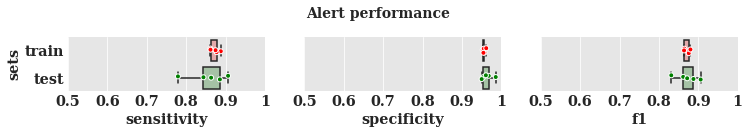

In [4]:
#Compute the alert performance..
sensitivity = train_sens_alert64 + test_sens_alert64
specificity = train_spec_alert64 + test_spec_alert64
f1 = train_f1_alert64 + test_f1_alert64

df = pd.DataFrame({'sets' : sets, 'sensitivity' : sensitivity, 'specificity' : specificity, 
                   'f1' : f1})

medianprops = dict(linestyle='-.', linewidth=0, color='firebrick')
meanlineprops = dict(linestyle='--', linewidth=1, color='black')

pal = {sets: "r" if sets == "train" else "b" for sets in df.sets.unique()}
pal['test'] = "g"
# Two subplots
f, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
f.text(0.4, 1.2, 'Alert performance', va='center', fontweight='bold',rotation='horizontal', fontsize=14)

sns.boxplot(x="sensitivity", y="sets", data=df, whis=np.inf, ax=ax1,palette=pal,showbox=True,dodge=False,
            meanprops=meanlineprops, meanline=True,showmeans=False, showfliers=True,showcaps=True, 
            medianprops=medianprops)
sns.stripplot(x="sensitivity", y="sets", data=df,jitter=True, linewidth=1, ax=ax1,palette=pal,
              edgecolor ="white")

for patch in ax1.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
sns.boxplot(x="specificity", y="sets", data=df, whis=np.inf, ax=ax2,palette=pal,showbox=True,dodge=False,
            meanprops=meanlineprops, meanline=True,showmeans=False, showfliers=True,showcaps=True, 
            medianprops=medianprops)
sns.stripplot(x="specificity", y="sets", data=df,jitter=True, linewidth=1, ax=ax2,palette=pal,
              edgecolor ="white")
for patch in ax2.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
sns.boxplot(x="f1", y="sets", data=df, whis=np.inf, ax=ax3,palette=pal,showbox=True,dodge=False,
            meanprops=meanlineprops, meanline=True,showmeans=False, showfliers=True,showcaps=True, 
            medianprops=medianprops)
sns.stripplot(x="f1", y="sets", data=df,jitter=True, linewidth=1, ax=ax3,palette=pal,edgecolor ="white")
for patch in ax3.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))    
ax2.set_ylabel('')
ax3.set_ylabel('')
ax1.set_xticks([0.5,0.6,0.7, 0.8,0.9,1])
ax1.axes.xaxis.set_ticklabels(['0.5','0.6','0.7','0.8','0.9','1',])
ax1.set_xlim(0.5, 1)
ax2.set_xticks([0.5,0.6,0.7, 0.8,0.9,1])
ax2.axes.xaxis.set_ticklabels(['0.5','0.6','0.7','0.8','0.9','1',])
ax2.set_xlim(0.5, 1)
ax3.set_xticks([0.5,0.6,0.7, 0.8,0.9,1])
ax3.axes.xaxis.set_ticklabels(['0.5','0.6','0.7','0.8','0.9','1',])
ax3.set_xlim(0.5, 1)

(0.5, 1)

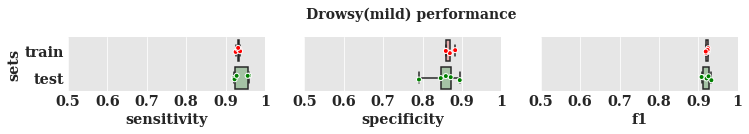

In [5]:
#Compute the drowsy(mild) performance..
sensitivity = train_sens_ripples64 + test_sens_ripples64
specificity = train_spec_ripples64 + test_spec_ripples64
f1 = train_f1_ripples64 + test_f1_ripples64

df = pd.DataFrame({'sets' : sets, 'sensitivity' : sensitivity, 'specificity' : specificity, 
                   'f1' : f1})

medianprops = dict(linestyle='-.', linewidth=0, color='firebrick')
meanlineprops = dict(linestyle='--', linewidth=1, color='black')

pal = {sets: "r" if sets == "train" else "b" for sets in df.sets.unique()}
pal['test'] = "g"
# Two subplots
f, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
f.text(0.4, 1.2, 'Drowsy(mild) performance', va='center', fontweight='bold',rotation='horizontal', 
       fontsize=14)
sns.boxplot(x="sensitivity", y="sets", data=df, whis=np.inf, ax=ax1,palette=pal,showbox=True,dodge=False,
            meanprops=meanlineprops, meanline=True,showmeans=False, showfliers=True,showcaps=True, 
            medianprops=medianprops)
sns.stripplot(x="sensitivity", y="sets", data=df,jitter=True, linewidth=1, ax=ax1,palette=pal,
              edgecolor ="white")

for patch in ax1.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
sns.boxplot(x="specificity", y="sets", data=df, whis=np.inf, ax=ax2,palette=pal,showbox=True,dodge=False,
            meanprops=meanlineprops, meanline=True,showmeans=False, showfliers=True,showcaps=True, 
            medianprops=medianprops)
sns.stripplot(x="specificity", y="sets", data=df,jitter=True, linewidth=1, ax=ax2,palette=pal,
              edgecolor ="white")
for patch in ax2.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
sns.boxplot(x="f1", y="sets", data=df, whis=np.inf, ax=ax3,palette=pal,showbox=True,dodge=False,
            meanprops=meanlineprops, meanline=True,showmeans=False, showfliers=True,showcaps=True, 
            medianprops=medianprops)
sns.stripplot(x="f1", y="sets", data=df,jitter=True, linewidth=1, ax=ax3,palette=pal,edgecolor ="white")
for patch in ax3.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))    
ax2.set_ylabel('')
ax3.set_ylabel('')
ax1.set_xticks([0.5,0.6,0.7, 0.8,0.9,1])
ax1.axes.xaxis.set_ticklabels(['0.5','0.6','0.7','0.8','0.9','1',])
ax1.set_xlim(0.5, 1)
ax2.set_xticks([0.5,0.6,0.7, 0.8,0.9,1])
ax2.axes.xaxis.set_ticklabels(['0.5','0.6','0.7','0.8','0.9','1',])
ax2.set_xlim(0.5, 1)
ax3.set_xticks([0.5,0.6,0.7, 0.8,0.9,1])
ax3.axes.xaxis.set_ticklabels(['0.5','0.6','0.7','0.8','0.9','1',])
ax3.set_xlim(0.5, 1)

(0.5, 1)

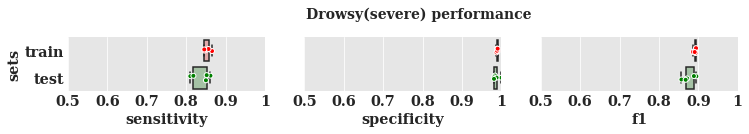

In [6]:
#Compute the drowsy(severe) performance..
sensitivity = train_sens_grapho64 + test_sens_grapho64
specificity = train_spec_grapho64 + test_spec_grapho64
f1 = train_f1_grapho64 + test_f1_grapho64

df = pd.DataFrame({'sets' : sets, 'sensitivity' : sensitivity, 'specificity' : specificity, 
                   'f1' : f1})

medianprops = dict(linestyle='-.', linewidth=0, color='firebrick')
meanlineprops = dict(linestyle='--', linewidth=1, color='black')

pal = {sets: "r" if sets == "train" else "b" for sets in df.sets.unique()}
pal['test'] = "g"
# Two subplots
f, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
#st = f.suptitle("Drowsy(grapho) performance", fontsize="x-large")
f.text(0.4, 1.2, 'Drowsy(severe) performance', va='center', fontweight='bold',rotation='horizontal', 
       fontsize=14)
sns.boxplot(x="sensitivity", y="sets", data=df, whis=np.inf, ax=ax1,palette=pal,showbox=True,dodge=False,
            meanprops=meanlineprops, meanline=True,showmeans=False, showfliers=True,showcaps=True, 
            medianprops=medianprops)
sns.stripplot(x="sensitivity", y="sets", data=df,jitter=True, linewidth=1, ax=ax1,palette=pal,
              edgecolor ="white")

for patch in ax1.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
sns.boxplot(x="specificity", y="sets", data=df, whis=np.inf, ax=ax2,palette=pal,showbox=True,dodge=False,
            meanprops=meanlineprops, meanline=True,showmeans=False, showfliers=True,showcaps=True, 
            medianprops=medianprops)
sns.stripplot(x="specificity", y="sets", data=df,jitter=True, linewidth=1, ax=ax2,palette=pal,
              edgecolor ="white")
for patch in ax2.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
sns.boxplot(x="f1", y="sets", data=df, whis=np.inf, ax=ax3,palette=pal,showbox=True,dodge=False,
            meanprops=meanlineprops, meanline=True,showmeans=False, showfliers=True,showcaps=True, 
            medianprops=medianprops)
sns.stripplot(x="f1", y="sets", data=df,jitter=True, linewidth=1, ax=ax3,palette=pal,edgecolor ="white")
for patch in ax3.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))    
ax2.set_ylabel('')
ax3.set_ylabel('')
ax1.set_xticks([0.5,0.6,0.7, 0.8,0.9,1])
ax1.axes.xaxis.set_ticklabels(['0.5','0.6','0.7','0.8','0.9','1',])
ax1.set_xlim(0.5, 1)
ax2.set_xticks([0.5,0.6,0.7, 0.8,0.9,1])
ax2.axes.xaxis.set_ticklabels(['0.5','0.6','0.7','0.8','0.9','1',])
ax2.set_xlim(0.5, 1)
ax3.set_xticks([0.5,0.6,0.7, 0.8,0.9,1])
ax3.axes.xaxis.set_ticklabels(['0.5','0.6','0.7','0.8','0.9','1',])
ax3.set_xlim(0.5, 1)